In [1]:
!pip install -q yfinance

     |████████████████████████████████| 6.3MB 8.0MB/s 


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

### Ações

In [4]:
def fix_col_names(df):
  return ['IBOV' if col =='^BVSP' else col.rstrip('.SA') for col in df.columns]

In [9]:
tickers = ['PETR4.SA','VALE3.SA','ITUB4.SA','ITSA4.SA','WEGE3.SA','TAEE11.SA']
prices = yf.download(tickers, start='2015-01-01')['Adj Close']
prices.columns = fix_col_names(prices)
prices.dropna(inplace=True)

[*********************100%***********************]  6 of 6 completed


In [10]:
retorno = np.log(prices / prices.shift(1)).dropna()

In [11]:
retorno.head()

,ITSA4,ITUB4,PETR4,TAEE11,VALE3,WEGE3
Date,,,,,,
2015-01-05,0.003266,0.005013,-0.089345,-0.003720,-0.015152,0.006795
2015-01-06,0.007580,0.016047,-0.033257,0.001596,0.039294,-0.014945
2015-01-07,0.037061,0.035540,0.046026,0.001593,0.036040,-0.011523
2015-01-08,0.010341,0.015522,0.062590,0.009509,0.010563,0.016747
2015-01-09,-0.035606,-0.044714,0.029885,-0.006859,-0.021687,-0.004569


### Gráficos dos Preços de Fechamento

In [12]:
fig = go.Figure()

for col in prices.columns:
  fig.add_scatter(x=prices.index, y=prices[col], name=col)

fig.layout.title ='Preços de Fechamento Ajustado'
fig.layout.xaxis.title = 'Data'
fig.layout.yaxis.title = 'Preço (R$)'

fig.show()

In [13]:
norm_prices = 100 * prices / prices.iloc[0]

In [16]:
norm_prices.head()

,ITSA4,ITUB4,PETR4,TAEE11,VALE3,WEGE3
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.327131,100.502545,91.452998,99.628646,98.496212,100.681829
2015-01-06,101.090469,102.128346,88.461541,99.787815,102.443586,99.188322
2015-01-07,104.907286,105.823246,92.628221,99.946944,106.202999,98.051925
2015-01-08,105.997805,107.478595,98.611135,100.901827,107.330817,99.707796


In [15]:
fig = go.Figure()

for col in norm_prices.columns:
  fig.add_scatter(x=norm_prices.index, y=norm_prices[col], name=col)

fig.layout.title ='Preços base 100'
fig.layout.xaxis.title = 'Data'

fig.show()

In [17]:
# Qual o retorno percentual de cada ativo ao fim do perído?
norm_prices.iloc[-1] - 100

ITSA4     126.002590
ITUB4     108.862780
PETR4     216.883380
TAEE11    318.615371
VALE3     585.854466
WEGE3     507.952814
Name: 2021-05-17 00:00:00, dtype: float64

### Correlação

In [18]:
retorno.corr()

,ITSA4,ITUB4,PETR4,TAEE11,VALE3,WEGE3
ITSA4,1.000000,0.929553,0.594868,0.389375,0.349370,0.414046
ITUB4,0.929553,1.000000,0.610237,0.362068,0.373437,0.388886
PETR4,0.594868,0.610237,1.000000,0.322324,0.486992,0.365360
TAEE11,0.389375,0.362068,0.322324,1.000000,0.205375,0.292756
VALE3,0.349370,0.373437,0.486992,0.205375,1.000000,0.242603
WEGE3,0.414046,0.388886,0.365360,0.292756,0.242603,1.000000


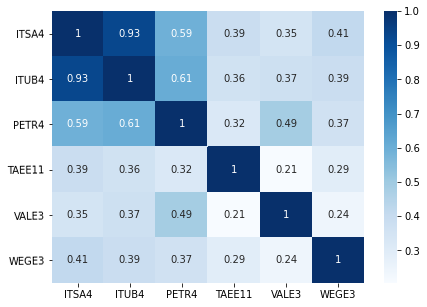

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(retorno.corr(), annot=True, cmap='Blues');
plt.tick_params(axis='y', labelrotation=0.9)